### Objective: Data Preprocessing, EDA, and Feature Engineering on the Titanic Dataset.
#### In this notebook, we will perform the following steps:
- Load the Dataset
- Data Preprocessing
- Exploratory Data Analysis (EDA)
- Feature Engineering
- Encoding & Scaling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train (1).csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Understanding data

In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Missing Value

In [9]:
missing = df.isnull().sum()
percentage = (((df.isnull().sum())/len(df))*100)
x = pd.DataFrame({'Missing Values':missing,'Missing Percentage':percentage})
print(x)

             Missing Values  Missing Percentage
PassengerId               0            0.000000
Survived                  0            0.000000
Pclass                    0            0.000000
Name                      0            0.000000
Sex                       0            0.000000
Age                     177           19.865320
SibSp                     0            0.000000
Parch                     0            0.000000
Ticket                    0            0.000000
Fare                      0            0.000000
Cabin                   687           77.104377
Embarked                  2            0.224467


#### Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

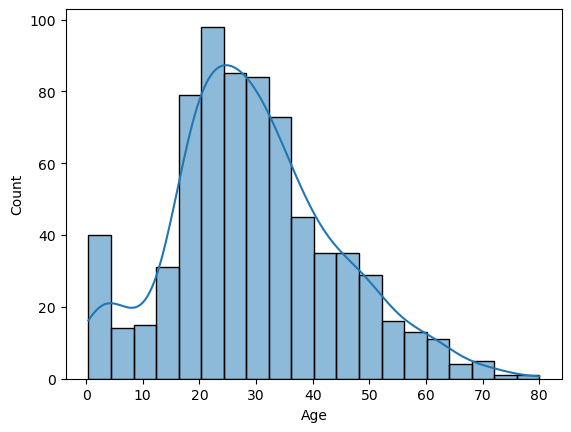

In [10]:
sns.histplot(df['Age'],kde=True)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

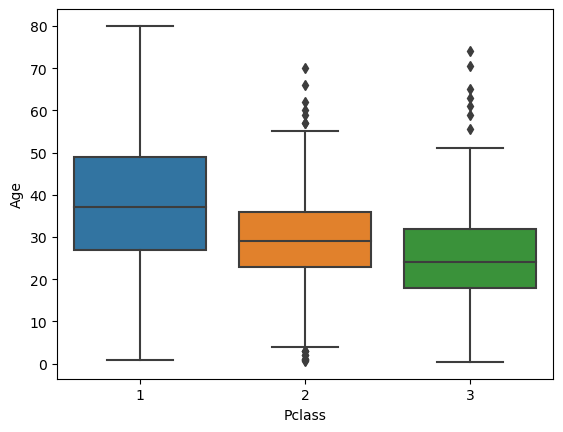

In [11]:
sns.boxplot(x=df['Pclass'],y=df['Age'])

In [12]:
df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median())) 

In [13]:
df['Has_Cabin'] = df['Cabin'].notnull().astype(int)

In [14]:
df.drop(columns=['Cabin'],inplace=True)

In [15]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

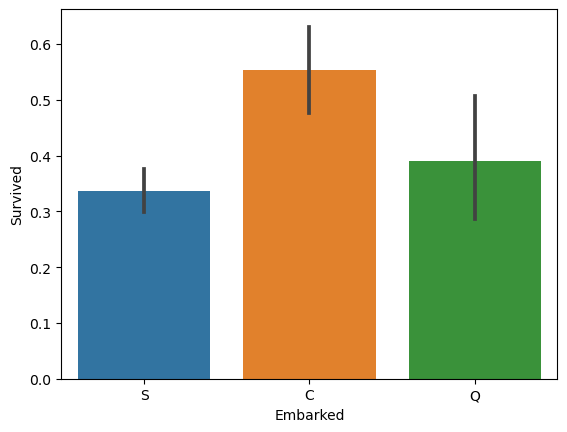

In [17]:
sns.barplot(x='Embarked', y='Survived', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Embarked'>

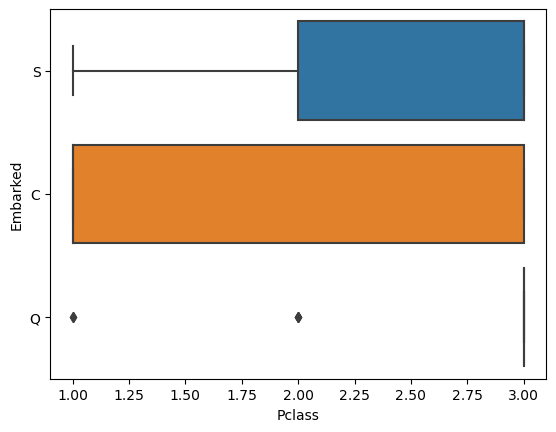

In [18]:
sns.boxplot(x=df['Pclass'],y=df['Embarked'])

<AxesSubplot:xlabel='Fare', ylabel='Embarked'>

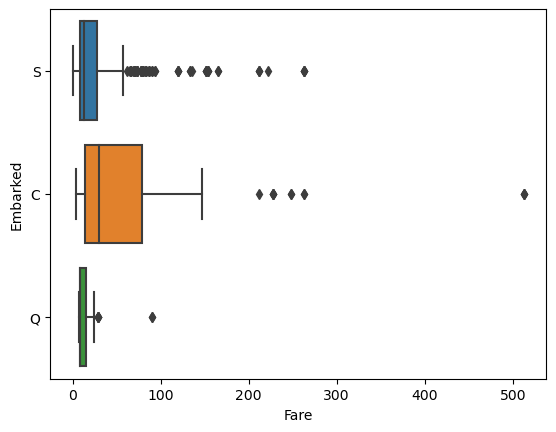

In [19]:
sns.boxplot(x=df['Fare'],y=df['Embarked'])

<AxesSubplot:xlabel='Age', ylabel='Embarked'>

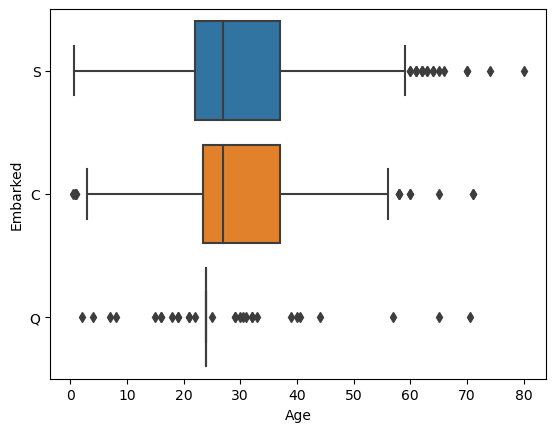

In [20]:
sns.boxplot(x=df['Age'],y=df['Embarked'])

In [21]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,1


In [22]:
df[(df['Pclass']==1) & (df['Fare']>75) & (df['Fare']<85)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,C,0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,C,1
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,NaN,1
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,S,1
102,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,S,1
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,S,1
139,140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,C,1
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,C,1
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,S,1
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,37.0,0,0,PC 17585,79.2000,C,0


In [23]:
df[(df['Pclass']==1) & (df['Fare']>75) & (df['Fare']<85)]['Embarked'].value_counts()

C    16
S    13
Name: Embarked, dtype: int64

In [24]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [25]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

### Dupliactes

In [26]:
df.duplicated().sum()

0

### Outliers

In [27]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Has_Cabin        int32
dtype: object

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PassengerId'>

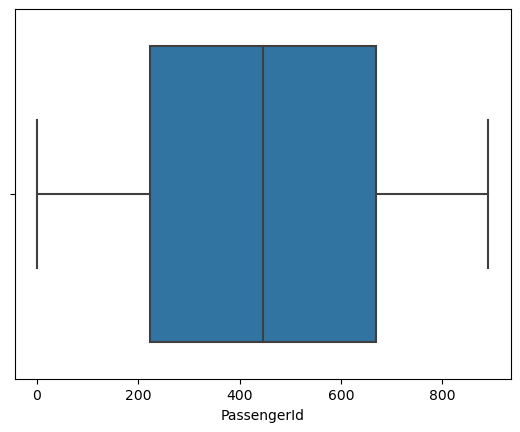

In [28]:
sns.boxplot(df['PassengerId'])

<AxesSubplot:xlabel='Survived', ylabel='Count'>

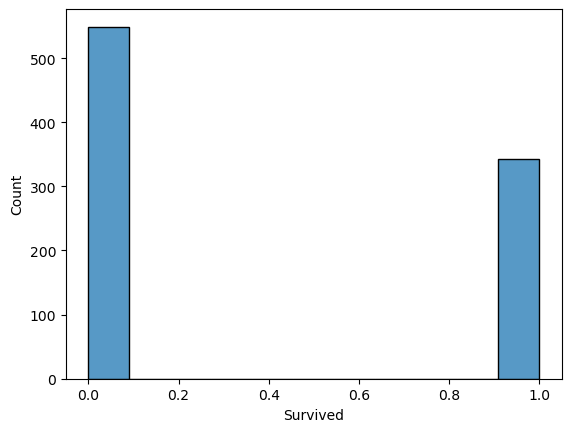

In [29]:
sns.histplot(df['Survived'])

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived'>

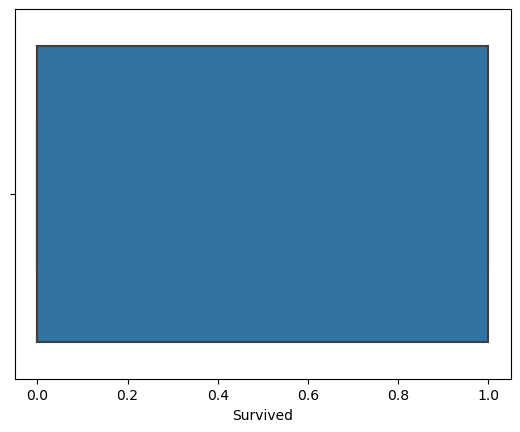

In [30]:
sns.boxplot(df['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

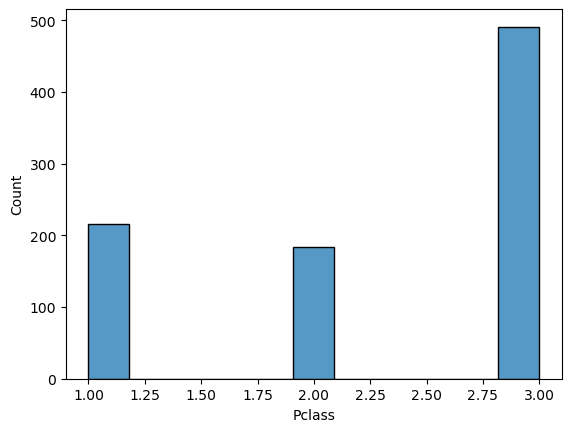

In [31]:
sns.histplot(df['Pclass'])

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass'>

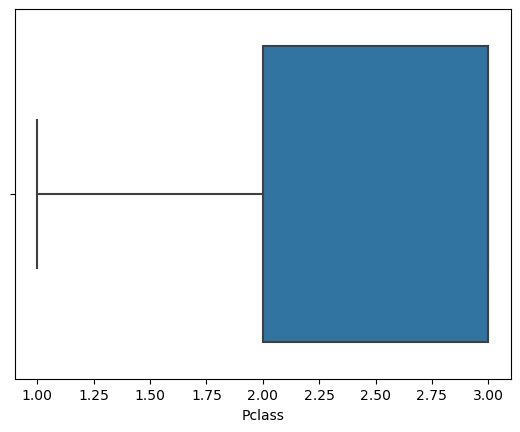

In [32]:
sns.boxplot(df['Pclass'])

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

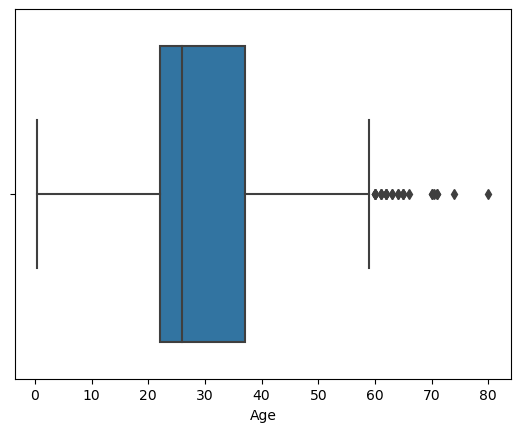

In [33]:
sns.boxplot(df['Age'])

In [34]:
df['Age'][df['Age']>60]

33     66.0
54     65.0
96     71.0
116    70.5
170    61.0
252    62.0
275    63.0
280    65.0
326    61.0
438    64.0
456    65.0
483    63.0
493    71.0
545    64.0
555    62.0
570    62.0
625    61.0
630    80.0
672    70.0
745    70.0
829    62.0
851    74.0
Name: Age, dtype: float64

- It's completely normal for some people to be 60-80 years old. Removing them as outliers would remove important data about older passengers' survival chances.

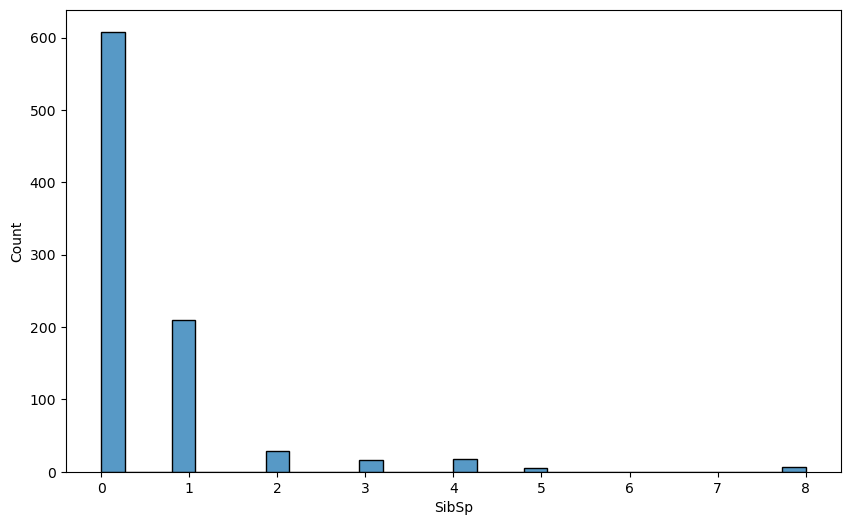

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(df['SibSp'], bins=30)
plt.show()

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp'>

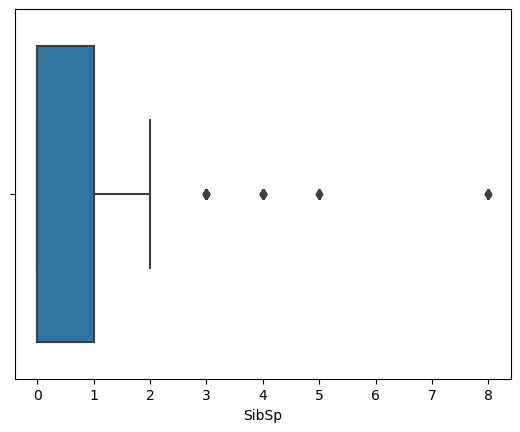

In [36]:
sns.boxplot(df['SibSp'])

In [37]:
df[df['SibSp']>2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q,0
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,S,0
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S,1
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,S,0
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,S,0
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,S,0
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,S,0
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,S,0
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,S,0


In [38]:
df[df['SibSp']>2]['SibSp'].value_counts()

4    18
3    16
8     7
5     5
Name: SibSp, dtype: int64

-Large families existed on the Titanic, so values like 3, 4, 5, 8 are realistic.
- Removing them could lose important survival trends (e.g., larger families may have had lower survival rates).

<AxesSubplot:xlabel='Parch', ylabel='Count'>

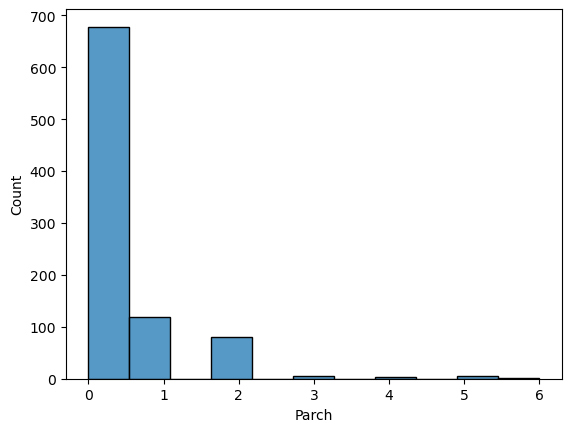

In [39]:
sns.histplot(df['Parch'])

<AxesSubplot:xlabel='Parch'>

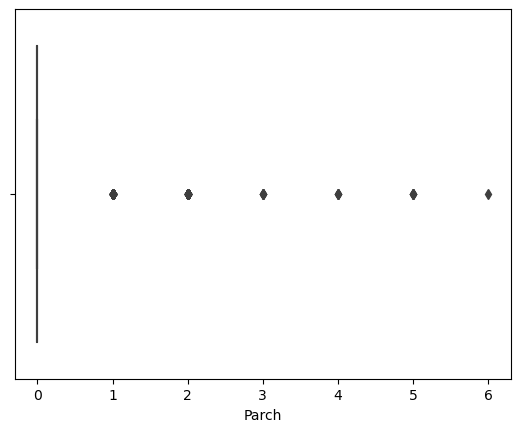

In [40]:
sns.boxplot(x=df['Parch'])

- Large families existed on the Titanic.
- Some passengers were traveling with multiple children or both parents.

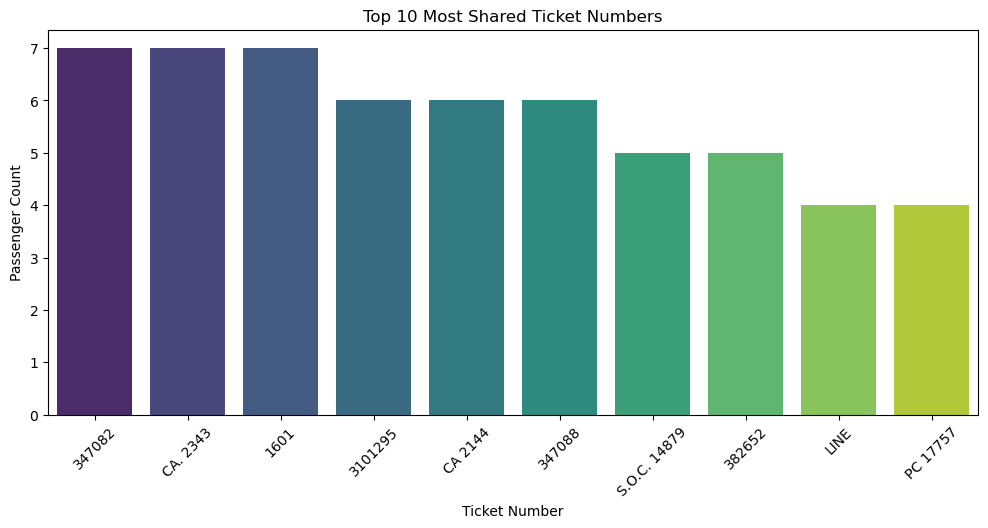

In [41]:
ticket_counts = df['Ticket'].value_counts().reset_index()
ticket_counts.columns = ['Ticket', 'Count']

# Plot top 10 most common tickets
plt.figure(figsize=(12, 5))
sns.barplot(x=ticket_counts['Ticket'][:10], y=ticket_counts['Count'][:10], palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Ticket Number")
plt.ylabel("Passenger Count")
plt.title("Top 10 Most Shared Ticket Numbers")
plt.show()

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

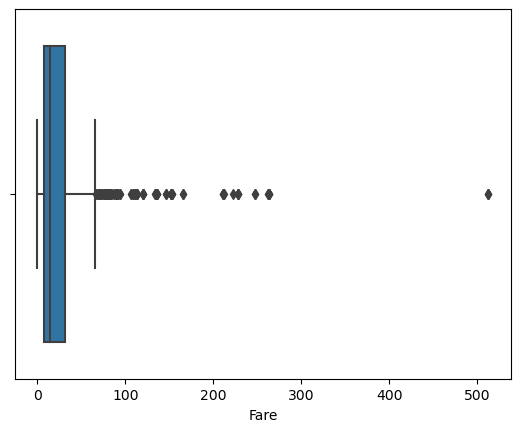

In [42]:
sns.boxplot(df['Fare'])

In [43]:
df[df['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,1


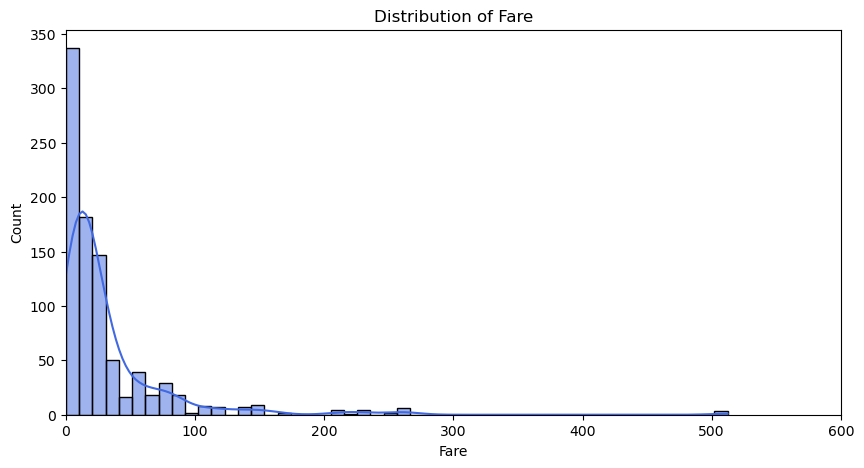

In [44]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Fare'], bins=50, kde=True, color="royalblue")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.title("Distribution of Fare")
plt.xlim(0, 600)  # Limit x-axis to see fares clearly
plt.show()

- Titanic had first-class tickets with very high fares, so values could be valid.

##### When Should You Remove Outliers?
- If outliers are errors or unrealistic values (e.g., age = 200, Fare = -50).
- If the model is highly sensitive to outliers.

### Encoding

In [45]:
df.select_dtypes(include=['object']).columns

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [46]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [47]:
df['Sex'] = df['Sex'].map({'male':0,'female':1})

In [48]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [49]:
df['Ticket_Prefix'] = df['Ticket'].apply(lambda x: x.split()[0] if not x.isdigit() else 'No_Prefix')

In [50]:
df['Ticket_Prefix']

0            A/5
1             PC
2       STON/O2.
3      No_Prefix
4      No_Prefix
         ...    
886    No_Prefix
887    No_Prefix
888        W./C.
889    No_Prefix
890    No_Prefix
Name: Ticket_Prefix, Length: 891, dtype: object

In [51]:
df = pd.get_dummies(df,columns=['Ticket_Prefix'],drop_first=True)

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Ticket_Prefix_SOTON/O.Q.,Ticket_Prefix_SOTON/O2,Ticket_Prefix_SOTON/OQ,Ticket_Prefix_STON/O,Ticket_Prefix_STON/O2.,Ticket_Prefix_SW/PP,Ticket_Prefix_W./C.,Ticket_Prefix_W.E.P.,Ticket_Prefix_W/C,Ticket_Prefix_WE/P
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,1,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Has_Cabin',
       'Ticket_Prefix_A.5.', 'Ticket_Prefix_A/4', 'Ticket_Prefix_A/4.',
       'Ticket_Prefix_A/5', 'Ticket_Prefix_A/5.', 'Ticket_Prefix_A/S',
       'Ticket_Prefix_A4.', 'Ticket_Prefix_C', 'Ticket_Prefix_C.A.',
       'Ticket_Prefix_C.A./SOTON', 'Ticket_Prefix_CA', 'Ticket_Prefix_CA.',
       'Ticket_Prefix_F.C.', 'Ticket_Prefix_F.C.C.', 'Ticket_Prefix_Fa',
       'Ticket_Prefix_LINE', 'Ticket_Prefix_No_Prefix', 'Ticket_Prefix_P/PP',
       'Ticket_Prefix_PC', 'Ticket_Prefix_PP', 'Ticket_Prefix_S.C./A.4.',
       'Ticket_Prefix_S.C./PARIS', 'Ticket_Prefix_S.O./P.P.',
       'Ticket_Prefix_S.O.C.', 'Ticket_Prefix_S.O.P.', 'Ticket_Prefix_S.P.',
       'Ticket_Prefix_S.W./PP', 'Ticket_Prefix_SC', 'Ticket_Prefix_SC/AH',
       'Ticket_Prefix_SC/PARIS', 'Ticket_Prefix_SC/Paris',
       'Ticket_Prefix_SCO/W', 'Ticket_Prefix_SO/C', 'Ticket_Prefix_SOTON/O.Q.',


In [54]:
df.dtypes

PassengerId                   int64
Survived                      int64
Pclass                        int64
Name                         object
Sex                           int64
Age                         float64
SibSp                         int64
Parch                         int64
Ticket                       object
Fare                        float64
Embarked                     object
Has_Cabin                     int32
Ticket_Prefix_A.5.            uint8
Ticket_Prefix_A/4             uint8
Ticket_Prefix_A/4.            uint8
Ticket_Prefix_A/5             uint8
Ticket_Prefix_A/5.            uint8
Ticket_Prefix_A/S             uint8
Ticket_Prefix_A4.             uint8
Ticket_Prefix_C               uint8
Ticket_Prefix_C.A.            uint8
Ticket_Prefix_C.A./SOTON      uint8
Ticket_Prefix_CA              uint8
Ticket_Prefix_CA.             uint8
Ticket_Prefix_F.C.            uint8
Ticket_Prefix_F.C.C.          uint8
Ticket_Prefix_Fa              uint8
Ticket_Prefix_LINE          

In [55]:
df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [56]:
df['Ticket_Num'] = df['Ticket'].apply(lambda x: ''.join(filter(str.isdigit,x)))

In [57]:
df['Ticket_Num'] = pd.to_numeric(df['Ticket_Num'], errors='coerce')

In [58]:
df.drop(columns=['Ticket'],inplace=True)

In [60]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [61]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [62]:
df.dtypes

PassengerId                   int64
Survived                      int64
Pclass                        int64
Name                         object
Sex                           int64
Age                         float64
SibSp                         int64
Parch                         int64
Fare                        float64
Has_Cabin                     int32
Ticket_Prefix_A.5.            uint8
Ticket_Prefix_A/4             uint8
Ticket_Prefix_A/4.            uint8
Ticket_Prefix_A/5             uint8
Ticket_Prefix_A/5.            uint8
Ticket_Prefix_A/S             uint8
Ticket_Prefix_A4.             uint8
Ticket_Prefix_C               uint8
Ticket_Prefix_C.A.            uint8
Ticket_Prefix_C.A./SOTON      uint8
Ticket_Prefix_CA              uint8
Ticket_Prefix_CA.             uint8
Ticket_Prefix_F.C.            uint8
Ticket_Prefix_F.C.C.          uint8
Ticket_Prefix_Fa              uint8
Ticket_Prefix_LINE            uint8
Ticket_Prefix_No_Prefix       uint8
Ticket_Prefix_P/PP          

In [63]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Has_Cabin,...,Ticket_Prefix_STON/O,Ticket_Prefix_STON/O2.,Ticket_Prefix_SW/PP,Ticket_Prefix_W./C.,Ticket_Prefix_W.E.P.,Ticket_Prefix_W/C,Ticket_Prefix_WE/P,Ticket_Num,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,...,0,0,0,0,0,0,0,521171.0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,...,0,0,0,0,0,0,0,17599.0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,...,0,1,0,0,0,0,0,23101282.0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,1,...,0,0,0,0,0,0,0,113803.0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,...,0,0,0,0,0,0,0,373450.0,0,1


### Scale Numerical Features

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()
df[['Age', 'Fare', 'Ticket_Num']] = scaler.fit_transform(df[['Age', 'Fare', 'Ticket_Num']])